In [289]:
import pandas as pd
import numpy as np

df = pd.read_stata("data/2017data.dta")
df.head()

,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
0,2,2014039,Qualified,NaN,NaN,0.8945,NaN,NaN,0.277188,19240.0,...,no,no,no,no,White,no,12.0,14.0,12.0,14.0
1,3,2019003,Qualified,0.9078,71115.0,NaN,0.9026,70707.0,1.020621,70841.0,...,no,no,no,yes,White,no,12.0,16.0,17.0,17.0
2,5,2145527,Qualified,0.7205,56442.0,NaN,0.7164,56121.0,0.810074,56227.0,...,no,no,no,no,White,no,9.0,7.5,14.0,17.0
3,6,2648857,Qualified,1.2597,98682.0,1.3507,1.2524,98110.0,0.418556,29052.0,...,no,no,no,no,White,no,16.0,12.0,12.0,12.0
4,7,2623465,Qualified,0.8686,68044.0,NaN,0.8636,67652.0,0.976522,67781.0,...,no,no,yes,no,White,no,14.0,17.0,16.0,16.0


In [290]:
print(df.shape)

print(df.columns)

print(df.dtypes)

(3510, 285)
Index(['CaseID', 'CASEID_NEW', 'qflag', 'weight1', 'weight1_freqwt', 'weight2',
       'weight1a', 'weight1a_freqwt', 'weight_combo', 'weight_combo_freqwt',
       ...
       'hcm2017q24_met_through_family', 'hcm2017q24_met_through_friend',
       'hcm2017q24_met_through_as_nghbrs', 'hcm2017q24_met_as_through_cowork',
       'w6_subject_race', 'interracial_5cat', 'partner_mother_yrsed',
       'subject_mother_yrsed', 'partner_yrsed', 'subject_yrsed'],
      dtype='object', length=285)
CaseID                     int16
CASEID_NEW                 int32
qflag                   category
weight1                  float64
weight1_freqwt           float32
                          ...   
interracial_5cat        category
partner_mother_yrsed     float32
subject_mother_yrsed     float32
partner_yrsed            float32
subject_yrsed            float32
Length: 285, dtype: object


In [291]:
#Convert data into numerical categorical fields

columns = df.columns

for column in columns:
    df[column]=df[column].astype('category').cat.codes    
    
df.fillna(df.mean(), inplace=True)

In [292]:
# Scale data to standardize values

data = ((df - df.min()) / (df.max() - df.min())) * 9 + 1
data.describe()


,CaseID,CASEID_NEW,qflag,weight1,weight1_freqwt,weight2,weight1a,weight1a_freqwt,weight_combo,weight_combo_freqwt,...,hcm2017q24_met_through_family,hcm2017q24_met_through_friend,hcm2017q24_met_through_as_nghbrs,hcm2017q24_met_as_through_cowork,w6_subject_race,interracial_5cat,partner_mother_yrsed,subject_mother_yrsed,partner_yrsed,subject_yrsed
count,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,...,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000
mean,5.500000,5.500000,1.297436,4.211504,4.211504,1.640420,4.347743,4.347743,5.282547,5.282547,...,5.802564,6.414103,5.465385,5.924359,3.509744,6.016667,6.350099,6.498619,7.407101,7.391453
std,2.599187,2.599187,1.609097,2.607137,2.607137,1.802236,2.568147,2.568147,2.284070,2.284070,...,1.936965,2.400060,1.524619,2.052195,1.699007,1.931889,2.022012,1.954804,1.755727,1.405878
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.250000,3.250000,1.000000,1.975664,1.975664,1.000000,2.192693,2.192693,3.660143,3.660143,...,5.500000,5.500000,5.500000,5.500000,2.800000,5.500000,6.538462,6.538462,6.538462,6.250000
50%,5.500000,5.500000,1.000000,3.714602,3.714602,1.000000,3.862464,3.862464,5.057714,5.057714,...,5.500000,5.500000,5.500000,5.500000,2.800000,5.500000,6.538462,6.538462,7.230769,7.000000
75%,7.750000,7.750000,1.000000,6.170354,6.170354,1.000000,6.299427,6.299427,6.991429,6.991429,...,5.500000,10.000000,5.500000,5.500000,2.800000,5.500000,7.230769,7.923077,8.615385,8.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [293]:
count_nan_in_df = data.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_df))

count_nan_in_df = data.isnull().sum()
print(count_nan_in_df)


data = data.dropna(axis=1)
data = data.reset_index(drop=True)

count_nan_in_df = data.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan_in_df))

print(data.head())

Count of NaN: 3510
CaseID                  0
CASEID_NEW              0
qflag                   0
weight1                 0
weight1_freqwt          0
                       ..
interracial_5cat        0
partner_mother_yrsed    0
subject_mother_yrsed    0
partner_yrsed           0
subject_yrsed           0
Length: 285, dtype: int64
Count of NaN: 0
     CaseID  CASEID_NEW  qflag   weight1  weight1_freqwt   weight2  weight1a  \
0  1.000000    4.272727    1.0  1.000000        1.000000  6.185279  1.000000   
1  1.002565    4.324024    1.0  3.814159        3.814159  1.000000  3.791547   
2  1.005130    4.824166    1.0  1.915929        1.915929  1.000000  1.941261   
3  1.007694    7.235110    1.0  7.623894        7.623894  8.058376  7.537249   
4  1.010259    7.053007    1.0  3.329646        3.329646  1.000000  3.320917   

   weight1a_freqwt  weight_combo  weight_combo_freqwt  ...  \
0         1.000000      2.162286             2.162286  ...   
1         3.791547      5.134857             5.1

In [294]:
# Initialize random centroids

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

centroids = random_centroids(data, 5)
centroids

,0,1,2,3,4
CaseID,1.079510,2.631234,5.252494,7.250499,1.931034
CASEID_NEW,6.378455,7.648048,5.521801,7.919920,5.098604
qflag,1.000000,1.000000,1.000000,1.000000,1.000000
weight1,9.329646,7.988938,3.004425,1.703540,6.422566
weight1_freqwt,3.840708,3.853982,2.539823,5.785398,1.000000
...,...,...,...,...,...
interracial_5cat,5.500000,5.500000,5.500000,5.500000,5.500000
partner_mother_yrsed,6.538462,3.769231,3.769231,6.538462,8.615385
subject_mother_yrsed,6.538462,5.153846,1.000000,6.538462,6.538462
partner_yrsed,7.230769,8.615385,9.307692,6.538462,6.538462


In [295]:
# Get labels for each data point

def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

labels = get_labels(data, centroids)

labels.value_counts()

3    1339
1     839
2     776
0     525
4      31
dtype: int64

In [296]:
# Create new centroids

def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

centroids2 = random_centroids(data, 5)
centroids2

,0,1,2,3,4
CaseID,5.134511,1.120547,2.882588,9.448561,1.813052
CASEID_NEW,5.467940,7.473639,3.157025,8.235395,8.271302
qflag,1.000000,1.000000,1.000000,1.000000,1.000000
weight1,4.829646,8.181416,4.033186,1.836283,9.840708
weight1_freqwt,5.971239,2.188053,3.615044,8.234513,2.015487
...,...,...,...,...,...
interracial_5cat,5.500000,5.500000,5.500000,5.500000,5.500000
partner_mother_yrsed,6.538462,9.307692,6.538462,6.538462,6.538462
subject_mother_yrsed,5.846154,6.538462,6.538462,7.230769,9.307692
partner_yrsed,9.307692,7.230769,5.153846,4.461538,6.538462


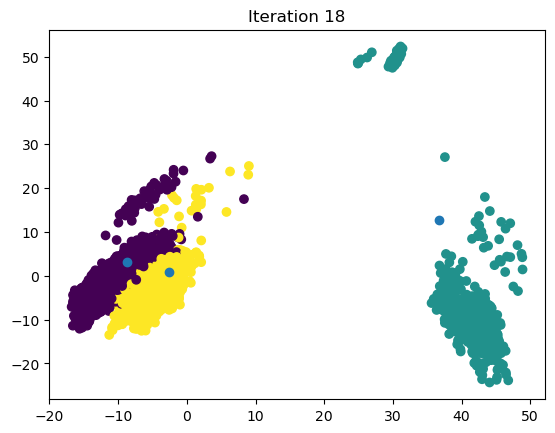

In [297]:
# Plot the centroids

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1